In [13]:
import matplotlib.pyplot as plt
import nibabel as nib
from torch.utils.data import DataLoader
import cv2
import numpy as np
from dataset.acdc import ACDCDataset
import h5py
import os
import torch
import yaml
import pandas as pd

%load_ext autoreload
%autoreload 2

## Dataset

In [14]:
cfg = yaml.load(open('configs/acdc_test_20.yaml', "r"), Loader=yaml.Loader)
test_dataset = ACDCDataset(cfg['dataset'], cfg['data_root'], 'val')
test_loader = DataLoader(test_dataset, batch_size=cfg['batch_size'], pin_memory=True, num_workers=cfg['num_workers'], drop_last=False)

In [15]:
image, mask = test_dataset[0]
print(image.shape)
print(mask.shape)

torch.Size([10, 256, 224])
torch.Size([10, 256, 224])


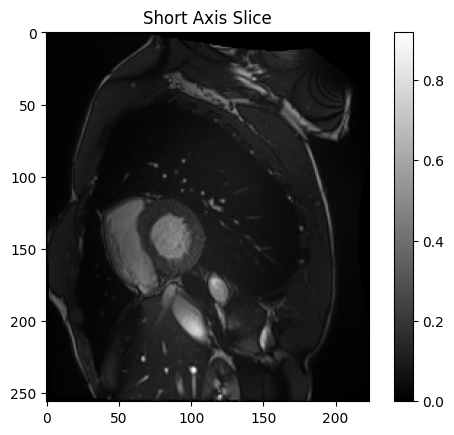

In [16]:
plt.imshow(image[0], cmap='gray')
plt.title('Short Axis Slice')
plt.colorbar()
plt.show()

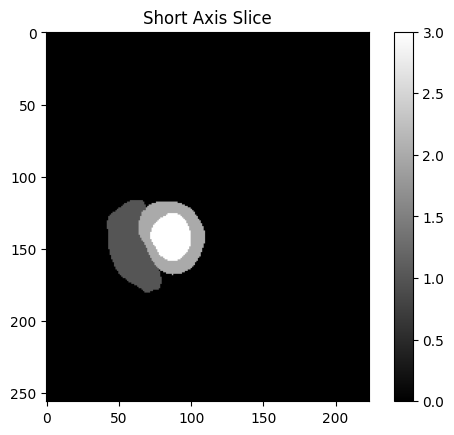

In [17]:
plt.imshow(mask[0], cmap='gray')
plt.title('Short Axis Slice')
plt.colorbar()
plt.show()

In [23]:
df = pd.read_csv(cfg['results_path'])

In [24]:
print(df['patient_id'].nunique())

20


In [25]:
print(len(df))

380


In [26]:
print("DICE Mean: ", df['dice_mean'].mean())
print("RV Mean: ", df['dice_rv'].mean())
print("MYO Mean: ", df['dice_myo'].mean())
print("LV Mean: ", df['dice_lv'].mean())

DICE Mean:  83.42340309784439
RV Mean:  80.56218600758817
MYO Mean:  82.25921763556052
LV Mean:  87.44880565038446


In [35]:
filtered_rows = df[df['dice_mean'] < 70]
filtered_rows

,patient_id,frame,slice_idx,dice_mean,dice_rv,dice_myo,dice_lv
0,11,frame01,0,6.160505e+01,5.617978e-11,8.668896e+01,9.812620e+01
9,11,frame02,0,5.816635e+01,6.455778e-11,8.039216e+01,9.410690e+01
38,84,frame01,0,6.176161e+01,2.023196e+01,6.989529e+01,9.515757e+01
48,84,frame01,10,5.872878e-10,1.331558e-10,7.812500e-10,8.474576e-10
49,84,frame01,11,1.425461e-09,1.742160e-10,1.470588e-09,2.631579e-09
...,...,...,...,...,...,...,...
363,59,frame02,8,3.333333e+01,1.000000e+02,6.250000e-10,1.298701e-09
370,52,frame01,6,2.660467e+01,7.246377e-10,1.923077e+01,6.058325e+01
371,52,frame01,7,3.333333e+01,1.000000e+02,6.211180e-10,7.194245e-10
378,52,frame02,6,4.954955e+00,1.000000e-07,1.486486e+01,1.763668e-10
